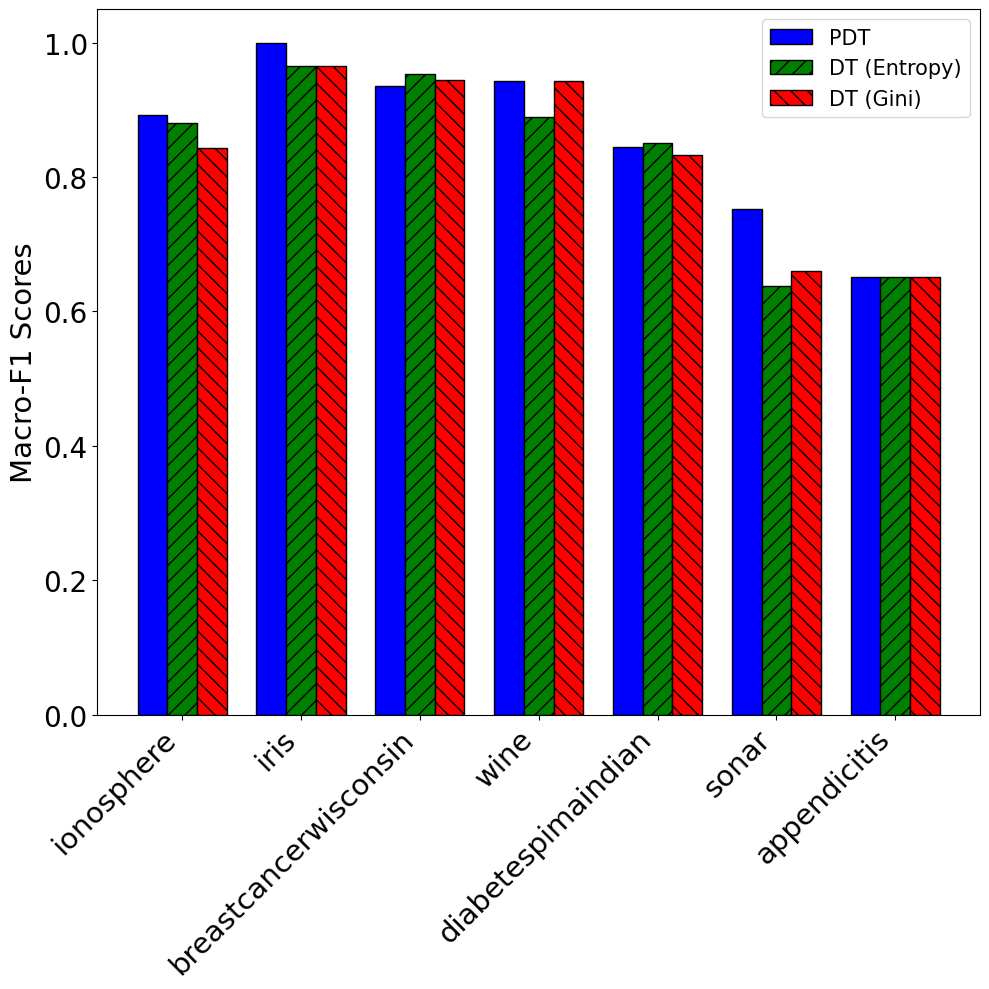

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to load F1 scores from .npy files
def load_f1_scores(base_dir):
    f1_scores = {}
    for dataset in os.listdir(base_dir):
        dataset_dir = os.path.join(base_dir, dataset)
        if os.path.isdir(dataset_dir):
            dt_path_entropy = os.path.join(dataset_dir, 'DT_Entropy', 'evaluation_metrics_dt_test.npy')
            dt_path_gini = os.path.join(dataset_dir, 'DT_gini', 'evaluation_metrics_dt_test.npy')
            pdt_path = os.path.join(dataset_dir, 'PDT', 'evaluation_metrics_pdt_test.npy')
            if os.path.exists(dt_path_entropy) and os.path.exists(pdt_path):
                dt_data_entropy = np.load(dt_path_entropy, allow_pickle=True).item()
                dt_data_gini = np.load(dt_path_gini, allow_pickle=True).item()
                pdt_data = np.load(pdt_path, allow_pickle=True).item()
                f1_scores[dataset] = {
                    'classical_dt_gini': dt_data_gini['F1 Score'],  # Assuming the structure in the .npy files
                    'classical_dt_entropy': dt_data_entropy['F1 Score'],  # Assuming the structure in the .npy files
                    'pdt': pdt_data['F1 Score_PDT']  # Assuming the structure in the .npy files
                }
    return f1_scores

# Path to the base directory containing dataset folders
base_dir = 'results'

# Load the F1 scores
f1_scores = load_f1_scores(base_dir)

# Prepare data for plotting
datasets = list(f1_scores.keys())
pdt_scores = [f1_scores[dataset]['pdt'] for dataset in datasets]
classical_dt_scores_entropy = [f1_scores[dataset]['classical_dt_entropy'] for dataset in datasets]
classical_dt_scores_gini = [f1_scores[dataset]['classical_dt_gini'] for dataset in datasets]
# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 10))

bar_width = 0.25
index = np.arange(len(datasets))

# Bar plot for PDT
bars1 = ax.bar(index, pdt_scores, bar_width, label='PDT', color='blue', edgecolor='black')

# Bar plot for Classical DT (Entropy)
bars2 = ax.bar(index + bar_width, classical_dt_scores_entropy, bar_width, label='DT (Entropy)', color='green', edgecolor='black', hatch='//')

# Bar plot for Classical DT (Gini)
bars3 = ax.bar(index + 2*bar_width, classical_dt_scores_gini, bar_width, label='DT (Gini)', color='red', edgecolor='black', hatch='\\\\')

# Adding labels and title
ax.set_ylabel('Macro-F1 Scores', fontsize=21)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(datasets, rotation=45, ha='right', fontsize=21)
ax.tick_params(axis='y', labelsize=20)
# Adjusted legend to appear inside the plot
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=15, frameon=True)

# Show plot
plt.tight_layout()
plt.show()

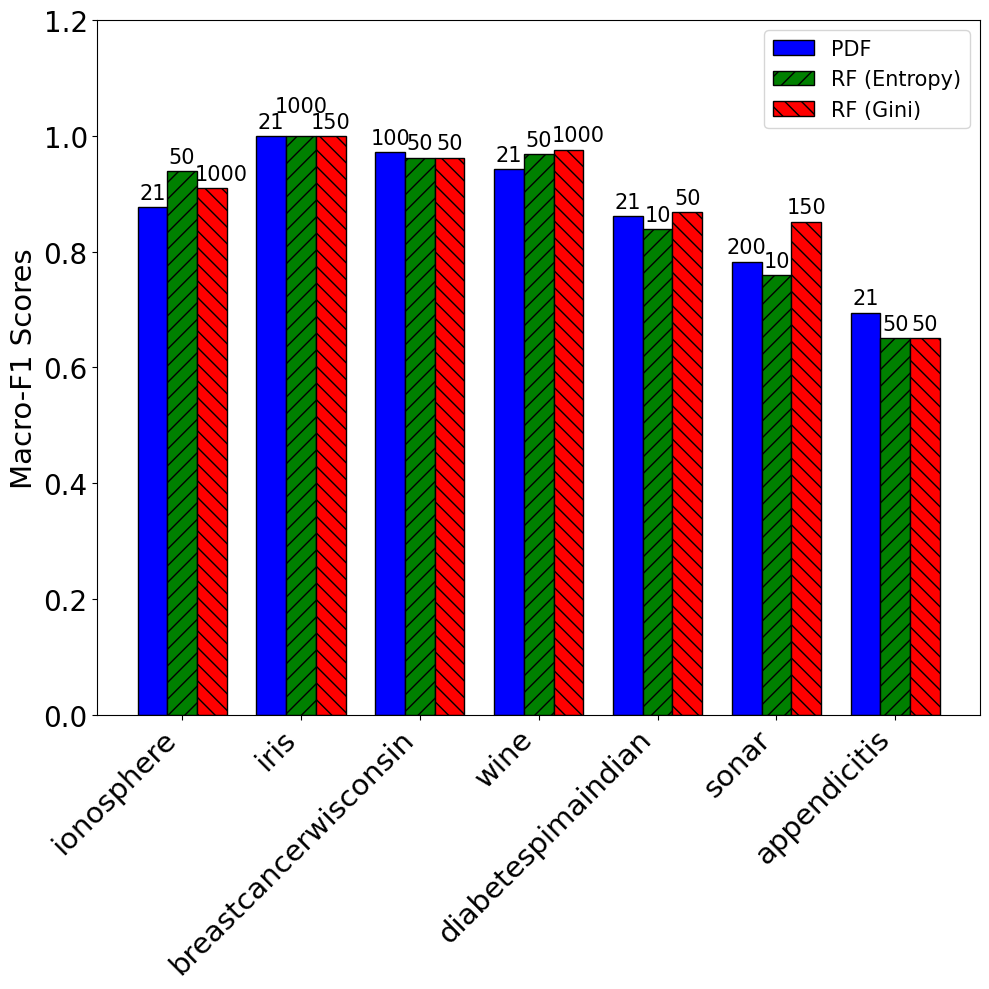

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to load F1 scores from .npy files
def load_f1_scores(base_dir):
    f1_scores = {}
    for dataset in os.listdir(base_dir):
        dataset_dir = os.path.join(base_dir, dataset)
        if os.path.isdir(dataset_dir):
            rf_path_gini = os.path.join(dataset_dir, 'RF', 'evaluation_metrics_rf_test.npy')
            rf_path_entropy = os.path.join(dataset_dir, 'RF_entropy', 'evaluation_metrics_rf_test.npy')
            pdf_path = os.path.join(dataset_dir, 'PDF', 'evaluation_metrics_pdf_test.npy')
            if os.path.exists(rf_path_gini) and os.path.exists(rf_path_entropy) and os.path.exists(pdf_path):
                rf_data_gini = np.load(rf_path_gini, allow_pickle=True).item()
                rf_data_entropy = np.load(rf_path_entropy, allow_pickle=True).item()
                pdf_data = np.load(pdf_path, allow_pickle=True).item()
                f1_scores[dataset] = {
                    'rf_gini': rf_data_gini['F1 Score'],
                    'rf_entropy': rf_data_entropy['F1 Score'],
                    'pdf': pdf_data['F1 Score'],
                    'best_n_estimator_gini': rf_data_gini['best_N_estimator_'],
                    'best_n_estimator_entropy': rf_data_entropy['best_N_estimator_']
                }
    return f1_scores

# Path to the base directory containing dataset folders
base_dir = 'results'
f1_scores = load_f1_scores(base_dir)  # Load the F1 scores

datasets = list(f1_scores.keys())
pdf_scores = [f1_scores[dataset]['pdf'] for dataset in datasets]
rf_scores_gini = [f1_scores[dataset]['rf_gini'] for dataset in datasets]
best_n_estimators_gini = [f1_scores[dataset]['best_n_estimator_gini'] for dataset in datasets]
rf_scores_entropy = [f1_scores[dataset]['rf_entropy'] for dataset in datasets]
best_n_estimators_entropy = [f1_scores[dataset]['best_n_estimator_entropy'] for dataset in datasets]

fig, ax = plt.subplots(figsize=(10, 10))  # Adjusted figure size
bar_width = 0.25
index = np.arange(len(datasets))

bars1 = ax.bar(index, pdf_scores, bar_width, label='PDF', color='blue', edgecolor='black')
bars2 = ax.bar(index + bar_width, rf_scores_entropy, bar_width, label='RF (Entropy)', color='green', edgecolor='black', hatch='//')
bars3 = ax.bar(index + 2*bar_width, rf_scores_gini, bar_width, label='RF (Gini)', color='red', edgecolor='black', hatch='\\\\')

ax.set_ylabel('Macro-F1 Scores', fontsize=21)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(datasets, rotation=45, ha='right', fontsize=21)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=15, frameon=True)
ax.tick_params(axis='y', labelsize=20)

# Custom annotation for PDF bars
pdf_annotations = []
for dataset in datasets:
    if dataset == 'sonar':
        pdf_annotations.append(200)
    elif dataset == 'breastcancerwisconsin':
        pdf_annotations.append(100)
    else:
        pdf_annotations.append(21)  # Default value for all other datasets

# Annotating the bars
for i, (bar, n_est) in enumerate(zip(bars2, best_n_estimators_entropy)):
    height = bar.get_height()
    vertical_offset = 14 if i == 1 else 3
    ax.annotate(f'{int(n_est)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, vertical_offset),  # Adjusted vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=15)

for i, (bar, n_est) in enumerate(zip(bars3, best_n_estimators_gini)):
    height = bar.get_height()
    horizontal_offset = 7 if i == 0 or i == 3 else 0  # Adjusted condition for horizontal offset
    ax.annotate(f'{int(n_est)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(horizontal_offset, 3),  # Adjusted both offsets
                textcoords="offset points",
                ha='center', va='bottom', fontsize=15)

# Annotating the PDF bars
for bar, annotation in zip(bars1, pdf_annotations):
    height = bar.get_height()
    ax.annotate(f'{int(annotation)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Dynamic offset based on the value
                textcoords="offset points",
                ha='center', va='bottom', fontsize=15)

ax.set_ylim(0, max(pdf_scores + rf_scores_gini + rf_scores_entropy) * 1.2)  # Adjust ylim

plt.tight_layout()
plt.show()
